In [ ]:
#Mounting on co-lab
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.insert(0,'/content/drive/My Drive/Interpretable_DNN') # change folder name

Mounted at /content/drive


In [ ]:
!pip install pacmap --quiet

     |████████████████████████████████| 647 kB 6.4 MB/s 


In [ ]:
#Import of Libaries

import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import math
import itertools
import pickle
from numpy.ma.core import argmax

#Data Preprocessing
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.cluster import KMeans


#Model Building and Explanations
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, backend, Model, callbacks
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pacmap


#custom functions
from functions.data_proc import *
from functions.experiment_setup import *
from functions.generate_inputs import *

### Experiment

In [ ]:
#Experimental parameters
prediction = 'Outcome' 
experiment =  'AG' #'AG_LS' #'AG','MS', 'IX'
timelapsed = 'total'
exp = 'EXP_2' #'EXP_0': old architecture, 'EXP_1': new architecture, 'EXP_2': Imbalanced test set

#Directories
MY_WORKSPACE_DIR = "/content/drive/My Drive/Interpretable_DNN/BPIC12_v2"
MILESTONE_DIR = "/content/drive/My Drive/Interpretable_DNN/BPIC12_v2/"+exp+'/'+experiment+'/'

log = 'BPIC_2012'

#Dataset
log_name = 'bpic_2012'


### Evaluation of Model Results

In [ ]:
#files

#model results
file_results = os.path.join(MILESTONE_DIR,log_name+'_'+experiment+'_results.csv')

#LR results
file_results_LR = os.path.join(MILESTONE_DIR,os.path.join('EVAL',log_name+'_'+experiment+'_LR_results.csv'))


#DL results
file_results_DL = os.path.join(MILESTONE_DIR,os.path.join('EVAL',log_name+'_'+experiment+'_DL_results.csv'))

#loading dataframes

#model results
df_results = pd.read_csv(file_results).reset_index(drop = True)
df_results = df_results.iloc[:,1:]

#LR results
df_results_LR = pd.read_csv(file_results_LR).reset_index(drop = True)
df_results_LR = df_results_LR.iloc[:,1:]

#DL results
df_results_DL = pd.read_csv(file_results_DL).reset_index(drop = True)
df_results_DL = df_results_DL.iloc[:,1:]


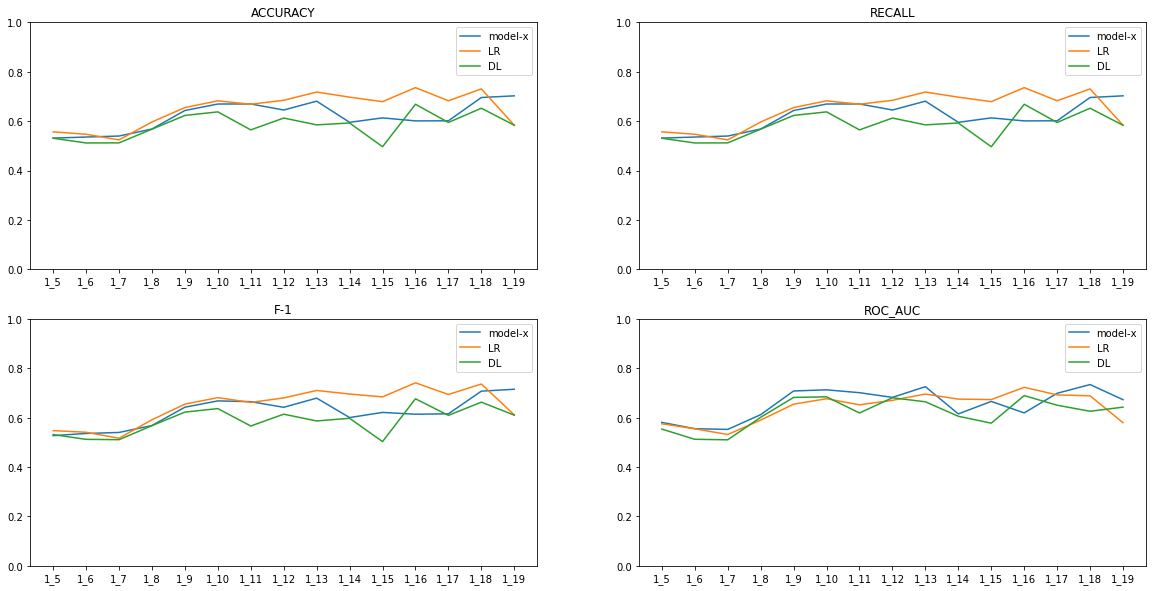

In [ ]:
#Plot Results

fig, axes = plt.subplots(2,2,figsize = (20,10))
metrics = np.asarray(['ACCURACY'	,	'RECALL',	'F-1','ROC_AUC']).reshape(2,2)

for i in range(2):
  for j in range(2):
    x = df_results['BUCKET'][:-1]
    y = df_results[metrics[i,j]][:-1]
    y_LR = df_results_LR[metrics[i,j]][:-1]
    y_DL = df_results_DL[metrics[i,j]][:-1]

    axes[i,j].plot(x,y,label = "model-x")
    axes[i,j].plot(x,y_LR,label = "LR")
    axes[i,j].plot(x,y_DL,label = "DL")

    axes[i,j].legend()

    axes[i,j].set_title(metrics[i,j])
    axes[i,j].set_ylim(0,1)


